# Twitter Analysis
Koosha Zarei

Telecom SudParisSeptember 2018

Libraries:
    - pymongo
    - json
    - re
    - landgetect
    - twitter
    - pd

In [1]:
#Import all libraries that are required
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('seaborn')

plt.rcParams['figure.figsize'] = (15, 5)
import calendar
import numpy as np
from dateutil import parser

import re

try:
    import json
except ImportError:
    import simplejson as json

import pymongo
from twitter import Twitter, OAuth, TwitterHTTPError, TwitterStream
from langdetect import detect
from time import sleep
import datetime
from pandas.io.json import json_normalize

from bson import json_util, ObjectId
from pandas.io.json import json_normalize
import json

#NECESSARY FOR XTICKS OPTION, ETC.
from pylab import*

#Create MongoDB table or add on existing one

In [2]:
# MongoDB Database
twitterClient = pymongo.MongoClient()
twitter_db = twitterClient["crawler"]
twitter_col = twitter_db["Twitter"]

# Parameters

In [3]:
# Variables that contains the user credentials to access Twitter API
ACCESS_TOKEN = '875820913635323904-wMO5JcRGnVaVq43PwcL1QPhmIweNR49'
ACCESS_SECRET = 'SAkbctHUWM30AYy0KlUqEUSCJNyarCWQ7DMsunm9baEP7'
CONSUMER_KEY = 'odsjwfZ6lHHMey3c6UNMJ7tyu'
CONSUMER_SECRET = 'HiqhNBcdbm6RxJ4eiOTNwWaaOSscF6hOfKylmgEwXPdaPEI6SY'

TWITTER_CRAWLE_NUMBER = 10

LOG_FILE_NAME = 'twitter_crawler_log.txt'

In [4]:
# Authentication
oauth = OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET)
# Twitter Stream
twitter_stream = TwitterStream(auth=oauth, domain='userstream.twitter.com')

# Functions

In [5]:
def mongo_to_dataframe(mongo_data):

        sanitized = json.loads(json_util.dumps(mongo_data))
        normalized = json_normalize(sanitized)
        df = pd.DataFrame(normalized)

        return df

In [6]:
def _connect_mongo(host, port, username, password, db):
    """ A util for making a connection to mongo """

    if username and password:
        mongo_uri = 'mongodb://%s:%s@%s:%s/%s' % (username, password, host, port, db)
        conn = MongoClient(mongo_uri)
    else:
        conn = MongoClient(host, port)


    return conn[db]

In [7]:
def read_mongo(db, collection, query={}, host='localhost', port=27017, username=None, password=None, no_id=True):
    """ Read from Mongo and Store into DataFrame """

    # Connect to MongoDB
    db = _connect_mongo(host=host, port=port, username=username, password=password, db=db)

    # Make a query to the specific DB and Collection
    cursor = db[collection].find(query)

    # Expand the cursor and construct the DataFrame
    df =  pd.DataFrame(list(cursor))

    # Delete the _id
    if no_id:
        del df['_id']

    return df

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


                  retweet_count  Number_of_tweets
user.screen_name                                 
3fo_Kobla                     0                 1
Beny1688                      0                 1
CarnevaleNet                  0                 1
DWilly_7                      0                 1
Erikaj00                      0                 1
GithakaNginya                 0                 1
Print2Fits                    0                 1
SgtJuice                      0                 1
TheEconomist                  5                20
TheJDHabit                    0                 1
USATODAY                      1                40
UnexpectedEsq                 0                 1
Xarcane__                     0                 1
_yonniebabyy                  0                 1
cuIt127                       0                 1
jadenwap                      0                 1
kaitlin_meiring               0                 1
karinajoyaa                   0                 1


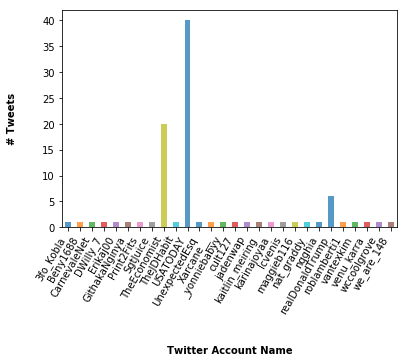

In [8]:
def show_data_group(amount=10):
    
    pd.set_option('display.max_columns', None)
    
#     raw_data = [{"created_at": item["created_at"],
# #             "text": item["text"],
#             "timestamp_ms": item["timestamp_ms"],
#             "user": "@%s" % item["user"]["screen_name"],
#             "retweeted": item["retweeted"],
#             } for item in twitter_col.find()]

    raw_data = list(twitter_col.find())
    
#     notmalize = json_normalize(raw_data)
    
#     data_all = pd.DataFrame(raw_data)
    data_all = mongo_to_dataframe(raw_data)

#     print (len(data_all))
#     print (data_all.columns)
#     print(data_all.head(amount))
    
    # Remove Column
#     data_all = data_all.drop('truncated', 1)
#     data_all = data_all.drop('quoted_status_permalink', 1)

    # create new dataframe representation
    dataframe_clean = data_all[['created_at','user.screen_name', 'retweet_count', 'text']]
#     print (dataframe_clean.columns)
#     print(dataframe_clean.head(amount))


    column_values = pd.unique(dataframe_clean['user.screen_name'].ravel())
#     print(len(column_values))
#     print(column_values)
    
    
#     print(dataframe_clean.dtypes)
    
    # get warning here !
    dataframe_clean['created_at'] = pd.to_datetime(dataframe_clean['created_at'])
#     print(dataframe_clean.dtypes)

    # set index
    dataframe_clean = dataframe_clean.set_index(['created_at'])
#     print(dataframe_clean.head(amount))

    account_count = dataframe_clean.groupby('user.screen_name').apply(f) 
    print( account_count)
    
    
#     counts = dataframe_clean.groupby('user.screen_name').size()
#     df2 = pd.DataFrame(counts, columns = ['size'])
#     print(df2)

#     account_count['Number_of_tweets'].plot(kind='bar')
    
    
    account_plot = account_count['Number_of_tweets'].plot(kind='bar', alpha=0.75)
    xticks(fontsize = 10,rotation=60, ha ="right")
    account_plot.set_xlabel('Twitter Account Name', weight='bold', labelpad=30)   
    account_plot.set_ylabel('# Tweets', weight='bold', labelpad=25)
    
    
#     account_count['Number_of_tweets'].plot(kind='barh')    
    
#     account_plot = account_count['Number_of_tweets'].plot(kind='barh', alpha=0.75)
#     xticks(fontsize = 12) #,rotation=60, ha ="right")
#     account_plot.set_ylabel('Twitter Account Name', weight='bold', labelpad=20)   
#     account_plot.set_xlabel('# Tweets', weight='bold', labelpad=25) #ADD PADDING TO RIGHT OF Y-AXIS LABEL


def f(x):
    return pd.Series(dict(
                        retweet_count=x['retweet_count'].min(),
                        Number_of_tweets = x['text'].count()
#                         Description=x['from_user_description'].min(),
                        ))


    

show_data_group(100)

/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


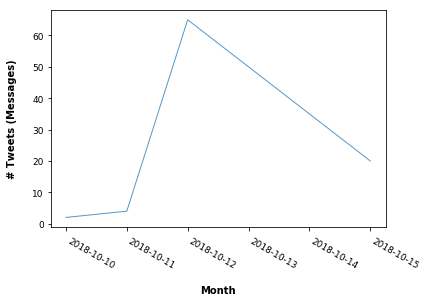

In [9]:
def show_data_time_period_date(amount=10):
    
    pd.set_option('display.max_columns', None)
    raw_data = list(twitter_col.find())
    data_all = mongo_to_dataframe(raw_data)

    # create new dataframe representation
    dataframe_clean = data_all[['created_at','user.screen_name', 'retweet_count', 'text']]
#     print (dataframe_clean.columns)
#     print(dataframe_clean.head(amount))

#     column_values = pd.unique(dataframe_clean['user.screen_name'].ravel())
#     print(len(column_values))
#     print(column_values)
        
#     print(dataframe_clean.dtypes)
    
    # get warning here !
    dataframe_clean['created_at'] = pd.to_datetime(dataframe_clean['created_at'])
#     print(dataframe_clean.dtypes)

    # set index
    dataframe_clean = dataframe_clean.set_index(['created_at'])
#     print(dataframe_clean.head(amount))

    daily_count = dataframe_clean.groupby(dataframe_clean.index.date).apply(f)
    daily_count.index.name = 'Date'
    
#     daily_count.tail(5) # tail
#     print(daily_count)
    
#     print(daily_count.index.min())# min value - date
#     print(daily_count.index.max())# max value - date
    
    daily_plot = daily_count['Number_of_tweets'].plot(kind='line', lw=1, alpha=0.75, legend=True,x_compat=True)
    daily_plot.set_xlabel('Month', weight='bold', labelpad=15)    #SET X-AXIS LABEL; ADD PADDING TO TOP OF LABEL
    daily_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL; ADD PADDING TO RIGHT OF LABEL
    xticks(fontsize = 9, rotation = -30, ha ="left")  #SET FONT PROPERTIES OF X-AXIS TICK LABELS
    yticks(fontsize = 9)                              #SET FONT PROPERTIES OF Y-AXIS TICK LABELS


    #http://matplotlib.org/users/legend_guide.html
    #http://nbviewer.ipython.org/gist/olgabot/5357268  ### LIST OF OPTIONS
    #legend(fontsize='x-small',loc=2,labelspacing=0.1, frameon=False)#.draggable()
    daily_plot.legend_ = None
    daily_plot.tick_params(axis='x', pad=5) #SET PADDING ABOVE X-AXIS LABELS
    #Set x axis label on top of plot, set label text --> https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
#     daily_plot.xaxis.set_label_position('top')


def f(x):
    return pd.Series(dict(Number_of_tweets = x['text'].count())
                    )
    
show_data_time_period_date(100)

            Number_of_tweets
created_at                  
0                         20
2                          2
3                          4
4                         65


/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


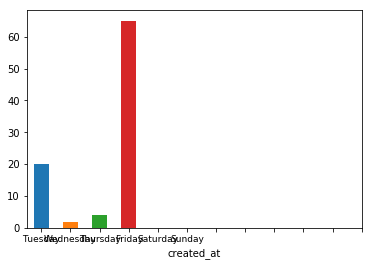

In [10]:
def show_data_time_period_daily(amount=10):
    
    pd.set_option('display.max_columns', None)
    raw_data = list(twitter_col.find())
    data_all = mongo_to_dataframe(raw_data)

    # create new dataframe representation
    dataframe_clean = data_all[['created_at','user.screen_name', 'retweet_count', 'text']]
    
    # get warning here !
    dataframe_clean['created_at'] = pd.to_datetime(dataframe_clean['created_at'])
#     print(dataframe_clean.dtypes)

    # set index
    dataframe_clean = dataframe_clean.set_index(['created_at'])
#     print(dataframe_clean.head(amount))

    daily_count = dataframe_clean.groupby(dataframe_clean.index.date).apply(f)
    daily_count.index.name = 'Date'

    weekday_count = dataframe_clean.groupby(dataframe_clean.index.weekday).apply(f)
    print(weekday_count)
    
#     days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#     weekday_count['day'] = days
#     print(weekday_count)

    day_of_week_plot = weekday_count['Number_of_tweets'].plot(kind='bar')
    day = list(calendar.day_name[1:])                                    #GENERATE LIST OF MONTHS
    xticks(np.arange(12), day, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS



def f(x):
    return pd.Series(dict(Number_of_tweets = x['text'].count())
                    )
    
show_data_time_period_daily(100)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


      Number_of_tweets
Date                  
1                    3
3                    1
5                    1
6                    2
7                    1
8                    2
10                   5
11                   9
12                  13
13                   9
14                  39
15                   4
19                   1
21                   1


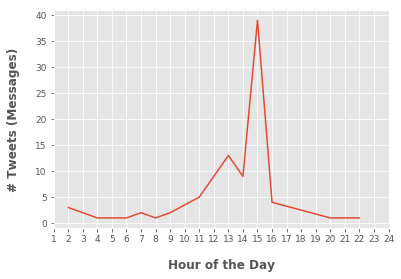

In [11]:
def show_data_time_period_hourly(amount=10):
    
#     pd.set_option('display.mpl_style', 'default')
#     pd.set_option('display.max_columns', None)
    print (mpl.style.available)
    mpl.style.use('ggplot')
    raw_data = list(twitter_col.find())
    data_all = mongo_to_dataframe(raw_data)

    # create new dataframe representation
    dataframe_clean = data_all[['created_at','user.screen_name', 'retweet_count', 'text']]
    
    # get warning here !
    dataframe_clean['created_at'] = pd.to_datetime(dataframe_clean['created_at'])
#     print(dataframe_clean.dtypes)

    # set index
    dataframe_clean = dataframe_clean.set_index(['created_at'])
#     print(dataframe_clean.head(amount))

    hourly_count = dataframe_clean.groupby(dataframe_clean.index.hour).apply(f)
    hourly_count.index.name = 'Date'
    print(hourly_count)
    

#     hourly_plot = hourly_count['Number_of_tweets'].plot()
#     xticks(np.arange(24), rotation = 0,fontsize = 9) 

    
    hourly_plot = hourly_count['Number_of_tweets'].plot(kind='line')
    hours = list(range(1,25))                                                #GENERATE LIST FROM 1 TO 24
    xticks(np.arange(24), hours, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

    hourly_plot.set_xlabel('Hour of the Day', weight='bold', labelpad=15)     #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
    hourly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

    xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
    yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS

def f(x):
    return pd.Series(dict(Number_of_tweets = x['text'].count())
                    )
    
show_data_time_period_hourly(100)

      Number_of_tweets
Date                  
10                  91


/Users/kooshazarei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


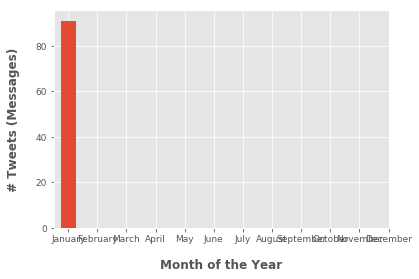

In [12]:
def show_data_time_period_monthly(amount=10):
    
    pd.set_option('display.max_columns', None)
    raw_data = list(twitter_col.find())
    data_all = mongo_to_dataframe(raw_data)

    # create new dataframe representation
    dataframe_clean = data_all[['created_at','user.screen_name', 'retweet_count', 'text']]
    
    # get warning here !
    dataframe_clean['created_at'] = pd.to_datetime(dataframe_clean['created_at'])
#     print(dataframe_clean.dtypes)

    # set index
    dataframe_clean = dataframe_clean.set_index(['created_at'])
#     print(dataframe_clean.head(amount))

    monthly_count = dataframe_clean.groupby(dataframe_clean.index.month).apply(f)
    monthly_count.index.name = 'Date'
    print(monthly_count)
                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS

    monthly_plot = monthly_count['Number_of_tweets'].plot(kind='bar')
    months = list(calendar.month_name[1:])                                    #GENERATE LIST OF MONTHS
    xticks(np.arange(12), months, rotation = 0,fontsize = 9)                  #USE THE CUSTOM TICKS

    monthly_plot.set_xlabel('Month of the Year', weight='bold', labelpad=15)  #SET X-AXIS LABEL, ADD PADDING TO TOP OF X-AXIS LABEL
    monthly_plot.set_ylabel('# Tweets (Messages)', weight='bold', labelpad=15) #SET Y-AXIS LABEL, ADD PADDING TO RIGHT OF Y-AXIS LABEL

    xticks(fontsize = 9, rotation = 0, ha= "center")                          #SET FONT SIZE FOR X-AXIS TICK LABELS
    yticks(fontsize = 9)                                                      #SET FONT SIZE FOR Y-AXIS TICK LABELS

def f(x):
    return pd.Series(dict(Number_of_tweets = x['text'].count())
                    )
    
show_data_time_period_monthly(100)